In [1]:
import pyLIMA
print(pyLIMA.__file__)


/home/anibal/anaconda3/lib/python3.11/site-packages/pyLIMA/__init__.py


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
import re
from tqdm.auto import tqdm
import warnings 
sys.path.append('/home/anibal/roman_rubin/fit_codes')
from fit_application import fit_light_curve
from filter_curves import filtros, read_curves
from plot_curves import plot_fit_rr, plot_fit_roman, plot_fit_model
from fit_results import best_model,errors,cov_matrix
from plot_models import plot_LCmodel
from fit_results import chi_dof, best_model, errors
from analysis_metrics import m1,m2,m3,Bins


path_model = '/home/anibal/files_db/filtered_curves/'
path_fits = '/home/anibal/roman_rubin/fit_filtered_curves/'

models = os.listdir(path_model)
files_fits = os.listdir(path_fits)

files_roman = [f for f in files_fits if 'Roman' in f]
files_rr = [f for f in files_fits if not 'Roman' in f]

et_rom = []#lista de eventos
for j in files_roman:
    number = re.findall(r'\d+', j)[0]
    et_rom.append(number)

et_rr = []#lista de eventos
for j in files_rr:
    number = re.findall(r'\d+', j)[0]
    et_rr.append(number)

n_rom = [float(x) for x in et_rom]
n_rr = [float(x) for x in et_rr]

# Convert lists to sets
set1 = set(n_rom)
set2 = set(n_rr)

# Find the common elements using intersection
common_elements = set1.intersection(set2)

# Convert the result back to a list (if needed)
common_elements_list = list(common_elements)
# Convert lists to sets
set1 = set(n_rom)
set2 = set(n_rr)

# Find the common elements using intersection
common_elements = set1.intersection(set2)

# Convert the result back to a list (if needed)
et = list(common_elements)
print(len(et))

771


## Set the files that contains the results of the fit of the choosen event

# compute the high chi squared cases

In [3]:

chi2_rr = pd.DataFrame(columns=['source', 'chichi'])
chi2_roman = pd.DataFrame(columns=['source', 'chichi'])

for e in tqdm(et):
    roman_file, rr_file = f'Event_Roman_{int(e)}_trf.npy',f'Event_Roman_{int(e)}_trf.npy'
    model_file = f'Event_{int(e)}.txt'
    value_to_add = e
    index_to_insert = 0
    chi2_rr.loc[len(chi2_rr)] = [value_to_add,chi_dof(path_model+model_file,path_fits+rr_file)]
    chi2_roman.loc[len(chi2_roman)] = [value_to_add,chi_dof(path_model+model_file,path_fits+roman_file)]

  0%|          | 0/771 [00:00<?, ?it/s]

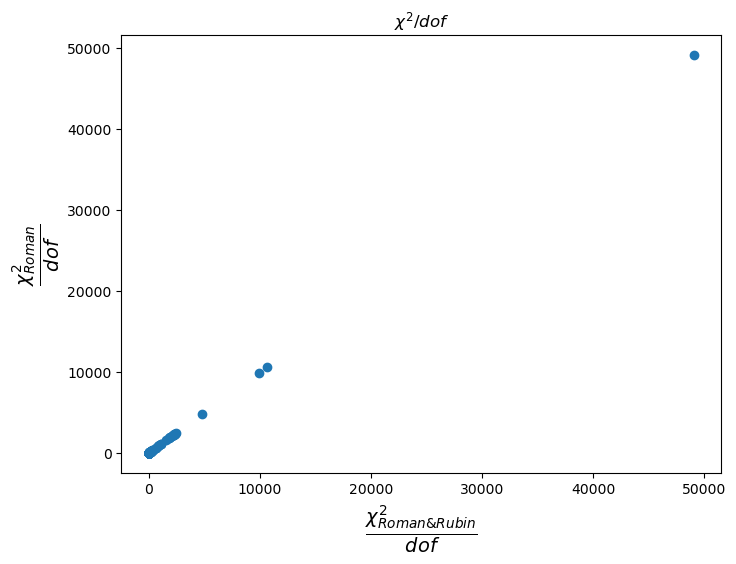

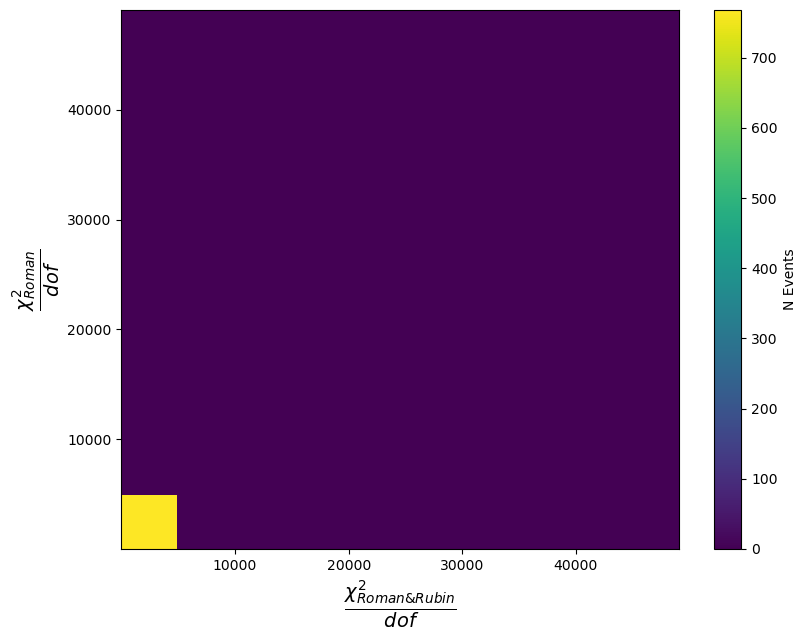

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(chi2_rr['chichi'],chi2_roman['chichi'],marker='o',linestyle=' ')
plt.xlabel(r'$\frac{\chi^{2}_{  Roman & Rubin}}{dof}$',fontsize=20)
plt.ylabel(r'$\frac{\chi^{2}_{  Roman}}{dof}$',fontsize=20)
plt.title(r'$\chi^2 /dof $')
plt.subplots_adjust(left=0.15, bottom=0.15)

plt.show()

plt.figure(figsize=(9,7),dpi=100)
plt.hist2d(chi2_rr['chichi'],chi2_roman['chichi'])#,marker='o',linestyle=' ')
# plt.ylabel(r'$\frac{|true_{'+f'{prop}'+'}-fit_{'+f'{prop}'+'}|}{'+'true_{'+f'{prop}'+'}}$',fontsize=20)
plt.xlabel(r'$\frac{\chi^{2}_{  Roman & Rubin}}{dof}$',fontsize=20)
plt.ylabel(r'$\frac{\chi^{2}_{  Roman}}{dof}$',fontsize=20)
cbar2 = plt.colorbar()
cbar2.set_label("N Events")
plt.show()


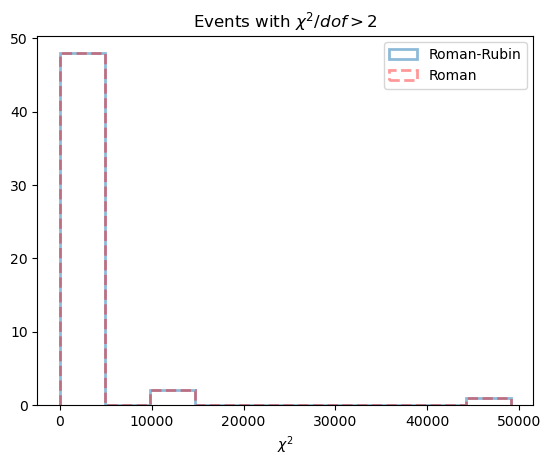

In [5]:
#MAL AJUSTADOS
chi_RR_OUT = chi2_rr[(chi2_rr['chichi']>2)]
chi_ROMAN_OUT = chi2_roman[(chi2_roman['chichi']>2)]
# print(chi_RR_OUT)
plt.hist(chi_RR_OUT['chichi'], histtype='step', fill=False,lw=2,alpha=0.5,label = 'Roman-Rubin')
plt.hist(chi_ROMAN_OUT['chichi'], histtype='step', fill=False,lw=2,linestyle='--',alpha=0.4,color='red',label ='Roman')
plt.xlabel('$\chi^2$')
plt.title(r'Events with $\chi^2/dof >2$')
plt.legend(loc='best')

0.9273670557717251
0.9273670557717251


Text(0.5, 0, '$\\chi^2$/dof')

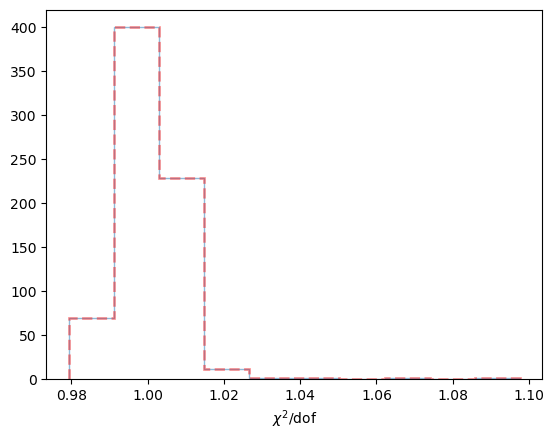

In [6]:
# bien ajustados
chi_RR = chi2_rr[(chi2_rr['chichi']<1.1)]
chi_ROMAN = chi2_roman[(chi2_roman['chichi']<1.1)]

print(len(chi_RR['chichi'])/len(chi2_rr['chichi']))
print(len(chi_ROMAN['chichi'])/len(chi2_roman['chichi']))
plt.hist(chi_RR['chichi'],histtype='step', fill=False,alpha=0.5)
plt.hist(chi_ROMAN['chichi'],histtype='step',lw=2,linestyle='--' ,fill=False,alpha=0.4,color='red')
plt.xlabel('$\chi^2$/dof')

Common elements between the two lists: 715


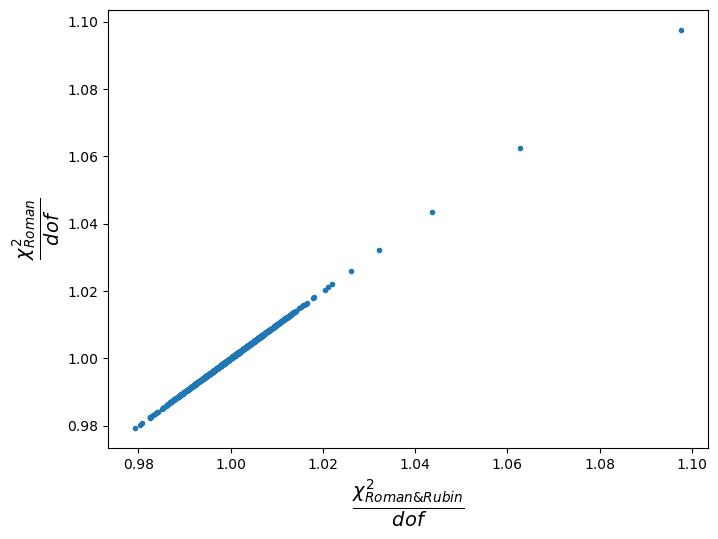

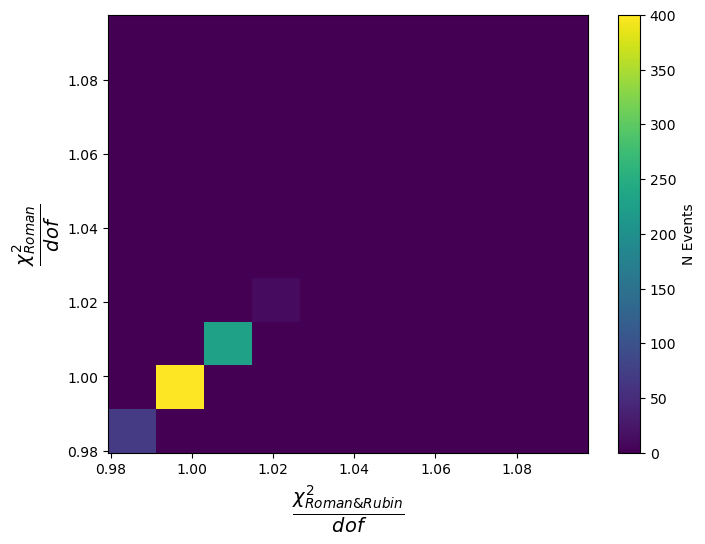

In [7]:
# print(chi_RR['source'])
# print(chi_ROMAN['source'])

set1 = set(chi_RR['source'].values)
set2 = set(chi_ROMAN['source'].values)

# Find the common elements using intersection
common_elements = set1.intersection(set2)

# Convert the result back to a list (if needed)
common_elements_list = list(common_elements)

# Check the result
# print("Common elements between the two lists:", common_elements_list)
print("Common elements between the two lists:", len(common_elements_list))

low_chisq_rr = chi_RR.loc[chi_RR['source'].isin(common_elements_list)]
low_chisq_roman = chi_ROMAN.loc[chi_ROMAN['source'].isin(common_elements_list)]
plt.figure(figsize=(8,6),dpi=100)
plt.plot(low_chisq_rr['chichi'],low_chisq_roman['chichi'],marker='.',linestyle=' ')
plt.xlabel(r'$\frac{\chi^{2}_{  Roman & Rubin}}{dof}$',fontsize=20)
plt.ylabel(r'$\frac{\chi^{2}_{  Roman}}{dof}$',fontsize=20)
plt.subplots_adjust(left=0.15, bottom=0.15)

plt.show()

# print(filtered_df)
plt.figure(figsize=(8,6),dpi=100)
plt.hist2d(low_chisq_rr['chichi'],low_chisq_roman['chichi'])#,marker='o',linestyle=' ')
# plt.ylabel(r'$\frac{|true_{'+f'{prop}'+'}-fit_{'+f'{prop}'+'}|}{'+'true_{'+f'{prop}'+'}}$',fontsize=20)
plt.xlabel(r'$\frac{\chi^{2}_{  Roman & Rubin}}{dof}$',fontsize=20)
plt.ylabel(r'$\frac{\chi^{2}_{  Roman}}{dof}$',fontsize=20)
cbar2 = plt.colorbar()
cbar2.set_label("N Events")
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.show()

## Lets plot some events with high chi squared

check_event  : Everything looks fine...


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
fit_Roman:4228
 chi_sq=190.8424


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


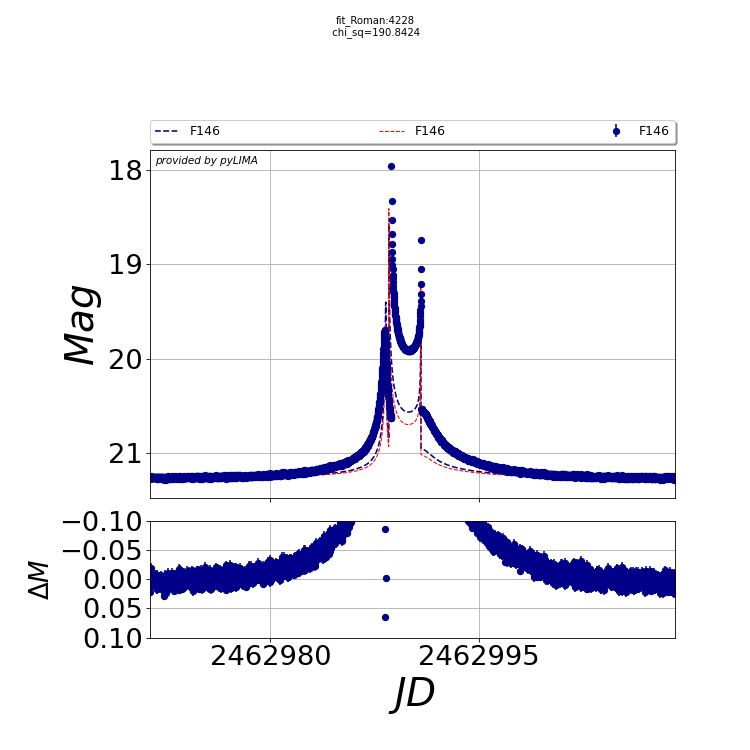

In [8]:
%matplotlib widget

N=int(chi_RR_OUT['source'].values[4])

roman_file, rr_file = f'Event_Roman_{N}_trf.npy',f'Event_Roman_{N}_trf.npy'
model_file = f'Event_{N}.txt'

plot_fit_roman(path_model+model_file, path_fits+roman_file)


#plot_fit_rr(path_model+model_file, path_fits+rr_file)

## low chi squared

In [9]:
N = int(list(common_elements)[9])
print(N)

8231


8231
check_event  : Everything looks fine...


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 7 of "dubious 

Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 7 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 18 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 18 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 18 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
fit_rr:8231
 chi_sq=0.9971


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2629 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2629 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2629 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_r: SUCCESS


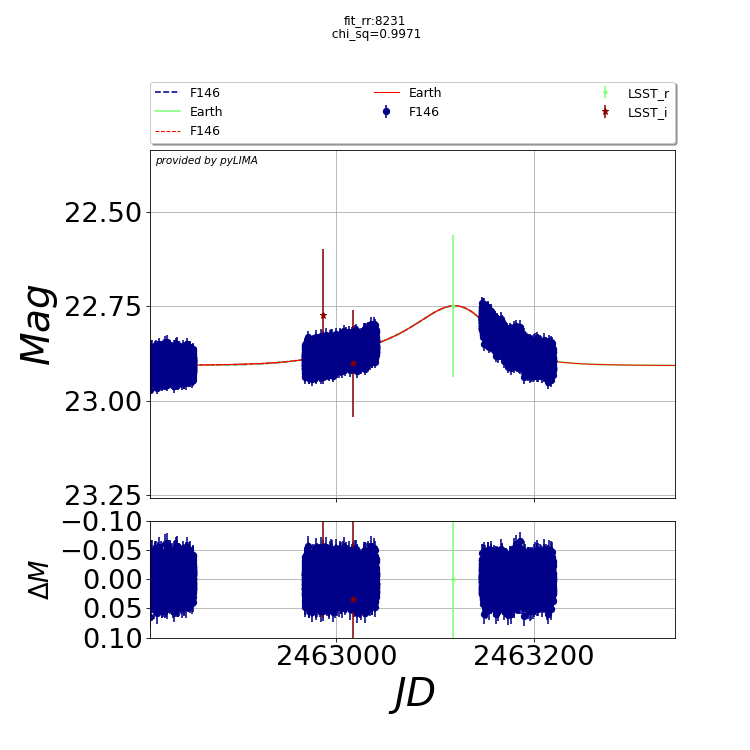

In [10]:
#%matplotlib widget
N=int(list(common_elements)[9])
print(N)
roman_file, rr_file = f'Event_Roman_{N}_trf.npy',f'Event_Roman_{N}_trf.npy'
model_file = f'Event_{N}.txt'
# plot_fit_roman(path_model+model_file, path_fits+roman_file)
plot_fit_rr(path_model+model_file, path_fits+rr_file)

In [11]:
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.outputs import pyLIMA_plots

path_ephemerides = '/home/anibal/files_db/james_webb.txt'
def plot_fit_model(path_model):
    #fit_params = best_model(path_file)
    curvas, params = read_curves(path_model)
         
    RA, DEC= 267.92497054815516, -29.152232510353276
    roman_event = event.Event(ra=RA, dec=DEC)
    
    roman_event.name = 'fit_Roman:'+str(int(params['Source']))#+'\n chi_sq='+str(round(chi_dof(path_model, path_file),4))

    telescope_1 = telescopes.Telescope(name = 'F146', 
                                       camera_filter = 'F146',
                                       light_curve = curvas['w'].astype(float),
                                       light_curve_names = ['time','mag','err_mag'],
                                       light_curve_units = ['JD','mag','mag'])

    telescope_1.location = 'Space'

    tlsst = 60350.38482057137+2400000.5
    ephemerides = np.loadtxt(path_ephemerides)
    ephemerides[:,0] = ephemerides[:,0]
    ephemerides[:,3] *=  60*300000/150000000
    deltaT = tlsst-ephemerides[:,0][0]
    ephemerides[:,0] = ephemerides[:,0]+deltaT
    telescope_1.spacecraft_positions ={'astrometry':[],'photometry':ephemerides}
    roman_event.telescopes.append(telescope_1)
    roman_event.check_event()

    psbl_roman = PSBL_model.PSBLmodel(roman_event, parallax=['Full', params['t0']])
    model_params = [params['t0'],params['u0'],params['te'],params['s'],params['q'],params['alpha'],params['piEN'],params['piEE']]

    list_of_fake_telescopes = []
    pyLIMA_plots.plot_lightcurves(psbl_roman, model_params)
N=int(chi_RR_OUT['source'].values[4])
roman_file, rr_file = f'Event_Roman_{N}_trf.npy',f'Event_Roman_{N}_trf.npy'
model_file = f'Event_{N}.txt'

# plot_fit_roman, path_fits+roman_file)

plot_fit_model(path_model+model_file)

check_event  : Everything looks fine...


/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


TypeError: plot_lightcurves() missing 1 required positional argument: 'true_parameters'